In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [120]:
def toHSI(rgb):
    
    R,G,B= cv2.split(rgb)
    r =R/255.0
    g =G/255.0
    b =B/255.0
    ix=(r+g+b)/3
       
    x=R.shape[0]
    y=R.shape[1]
    
    h=s=np.empty([x,y])

    for i in range(0, x-1):
        for j in range(0,y-1):
            if (r[i,j] == g[i,j] and g[i,j] == b[i,j]):
                s[i,j]=h[i,j]=0
            else:
                numerador= (r[i,j]-g[i,j]) + (r[i,j]-b[i,j])
                argum=(r[i,j]-g[i,j])*(r[i,j]-g[i,j])+(r[i,j]-b[i,j])*(g[i,j]-b[i,j])
                w=numerador/math.sqrt(argum)/2
                              
                
                h[i,j]=math.acos(w)*180/math.pi
                
                if (b[i,j]>g[i,j]):
                    h[i,j]=360.0-h[i,j]
                
                s[i,j]=1-min(r[i,j],g[i,j],b[i,j])/ix[i,j]
                
                
    #h*=180/math.pi
    #s*=100
    #i*=255
    hsi=cv2.merge([h,s,ix])
    return hsi.astype(np.float64)    

In [126]:
def toRGB(hsi):
    h,s,ix= cv2.split(hsi)
    
    #h*=math.pi/180
    #s=s/100
    #ix=ix/255
    
    x=h.shape[0]
    y=h.shape[1]
    r=g=b=np.empty([x,y])
    
    for i in range(0, x):
        for j in range(0,y):
            resta=(1-s[i,j])/3
            
            if (h[i,j] <0.0):
                r[i,j]=0
                g[i,j]=0
                b[i,j]=0
            elif (h[i,j]<120.0):
                b[i,j]=resta
                r[i,j]= (1+(s[i,j]*np.cos(h[i,j]/180*math.pi)/np.cos((60-h[i,j])/180*math.pi)))/3
                g[i,j]=1-r[i,j]-b[i,j]
                
            elif (h[i,j]<240.0):
                r[i,j]=resta
                g[i,j]=(1+(s[i,j]*np.cos(h[i,j]/180*math.pi)/np.cos((120-h[i,j])/180*math.pi)))/3
                b[i,j]=1-r[i,j]-g[i,j]
                
            elif (h[i,j]<360.0):
                g[i,j]=resta
                b[i,j]=(1+(s[i,j]*np.cos(h[i,j]/180*math.pi)/np.cos((240-h[i,j])/180*math.pi)))/3
                r[i,j]=1-g[i,j]-b[i,j]
            else:
                print("fuera de rango")
                r[i,j]=g[i,j]=b[i,j]=0
    
            #r[i,j]=round(ix[i,j]*r[i,j]*3)
            #g[i,j]=round(ix[i,j]*g[i,j]*3)
            #b[i,j]=round(ix[i,j]*b[i,j]*3)
    rgb=cv2.merge([r,g,b])
    return rgb.astype(np.uint8)

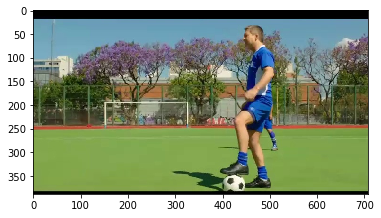

In [74]:
#Imagen Original
imagen = cv2.imread("img/5.jpg")
miRGB= cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(miRGB)

1.0


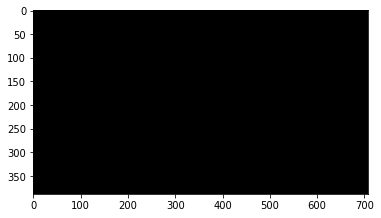

In [127]:
miHSI=toHSI(miRGB)
hz,sz,iz= cv2.split(miHSI)
print(np.amax(hz))
tuRGB=toRGB(miHSI)
#print(np.amax(miHSI))

plt.imshow(tuRGB)

In [128]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="video/tafirol.mp4">')